In [398]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [399]:
df = pd.read_csv('final_dataset.csv')

df.head()

,Year,District,Crop,Season,Rainfall_mm,Avg_Temp_C,Area_Ha,Yield_t_ha
0,1999.0,cuttack,rice,winter,40.0,25.0,133000.0,0.37
1,2000.0,cuttack,rice,winter,42.0,22.0,139830.0,1.19
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [400]:
df.shape

(9226, 8)

In [401]:
df = df.dropna()

In [402]:
df = df.drop(['Season'],axis=1)

In [403]:
df.describe()

,Year,Rainfall_mm,Avg_Temp_C,Area_Ha,Yield_t_ha
count,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000
mean,2012.543556,83.488121,26.174140,10719.002802,4.444550
std,5.499136,101.877629,9.341614,36766.061396,13.236608
min,1999.000000,4.000000,17.000000,0.000000,0.000000
25%,2008.000000,19.000000,22.000000,68.000000,0.290000
50%,2012.000000,29.000000,26.000000,437.500000,0.700000
75%,2017.000000,100.000000,29.000000,2239.250000,1.780000
max,2022.000000,418.000000,272.000000,687000.000000,115.800000


In [404]:
# plt.figure(figsize=(12, 6))

# sns.countplot(
#     data=df,
#     y='District',
#     order=df['District'].value_counts().index
# )

# # 3. Add title and labels
# plt.title('Count of Records by District Name', fontsize=16)
# plt.xlabel('Count of Records', fontsize=12)
# plt.ylabel('District Name', fontsize=12)

# # 4. Improve layout and save the plot
# plt.tight_layout()
# plt.savefig('district_count_bar_graph.png')
# plt.show()

# print("Bar graph saved as 'district_count_bar_graph.png'")

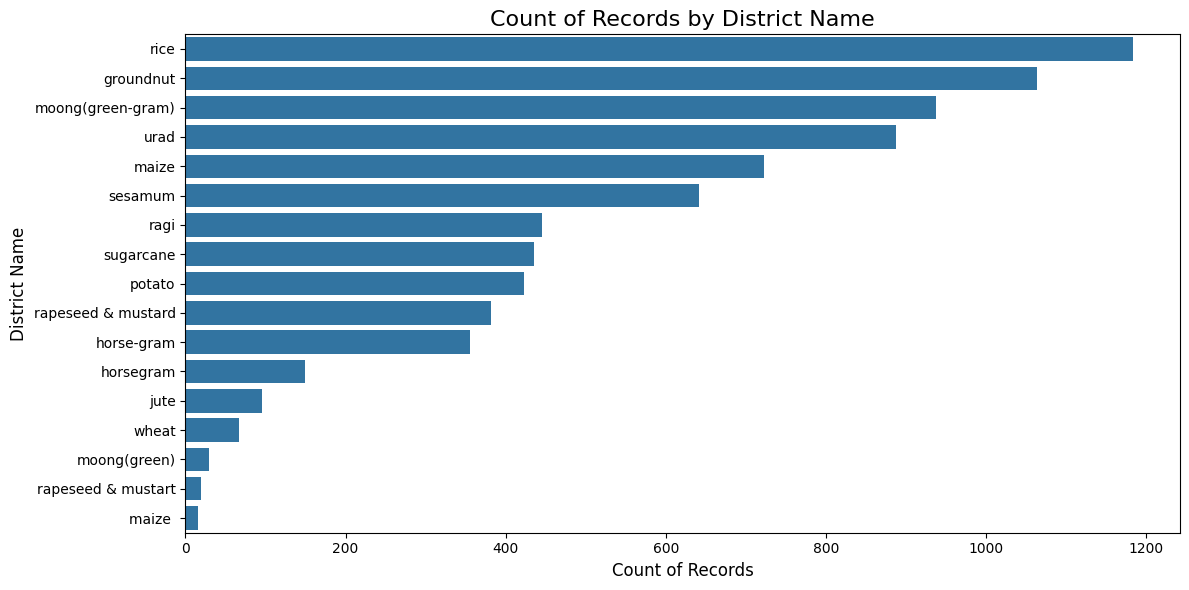

Bar graph saved as 'district_count_bar_graph.png'


In [405]:
plt.figure(figsize=(12, 6))

sns.countplot(
    data=df,
    y='Crop',
    order=df['Crop'].value_counts().index
)

# 3. Add title and labels
plt.title('Count of Records by District Name', fontsize=16)
plt.xlabel('Count of Records', fontsize=12)
plt.ylabel('District Name', fontsize=12)

# 4. Improve layout and save the plot
plt.tight_layout()
plt.savefig('district_count_bar_graph.png')
plt.show()

print("Bar graph saved as 'district_count_bar_graph.png'")

In [406]:
# filter according to size of crop data

cropsToKeep = ['rice','groundnut','moong(green-gram)']

df = df[df['Crop'].isin(cropsToKeep)].copy()

df.head()

,Year,District,Crop,Rainfall_mm,Avg_Temp_C,Area_Ha,Yield_t_ha
0,1999.0,cuttack,rice,40.0,25.0,133000.0,0.37
1,2000.0,cuttack,rice,42.0,22.0,139830.0,1.19
5,2004.0,cuttack,rice,46.0,27.0,129000.0,1.94
6,2005.0,cuttack,rice,39.0,20.0,135000.0,2.01
7,2006.0,cuttack,rice,38.0,24.0,121000.0,1.50


In [407]:
# df['Area_Ha'] = pd.to_numeric(df['Area_Ha'], errors='coerce')

In [408]:
df2 = df[['Year','Rainfall_mm','Avg_Temp_C','Yield_t_ha','Area_Ha']]

df2

,Year,Rainfall_mm,Avg_Temp_C,Yield_t_ha,Area_Ha
0,1999.0,40.0,25.0,0.37,133000.0
1,2000.0,42.0,22.0,1.19,139830.0
5,2004.0,46.0,27.0,1.94,129000.0
6,2005.0,39.0,20.0,2.01,135000.0
7,2006.0,38.0,24.0,1.50,121000.0
...,...,...,...,...,...
9221,2018.0,12.0,23.0,1.57,56240.0
9222,2019.0,13.0,21.0,2.28,51360.0
9223,2020.0,15.0,20.0,2.79,54170.0
9224,2021.0,15.0,20.0,2.29,59127.0


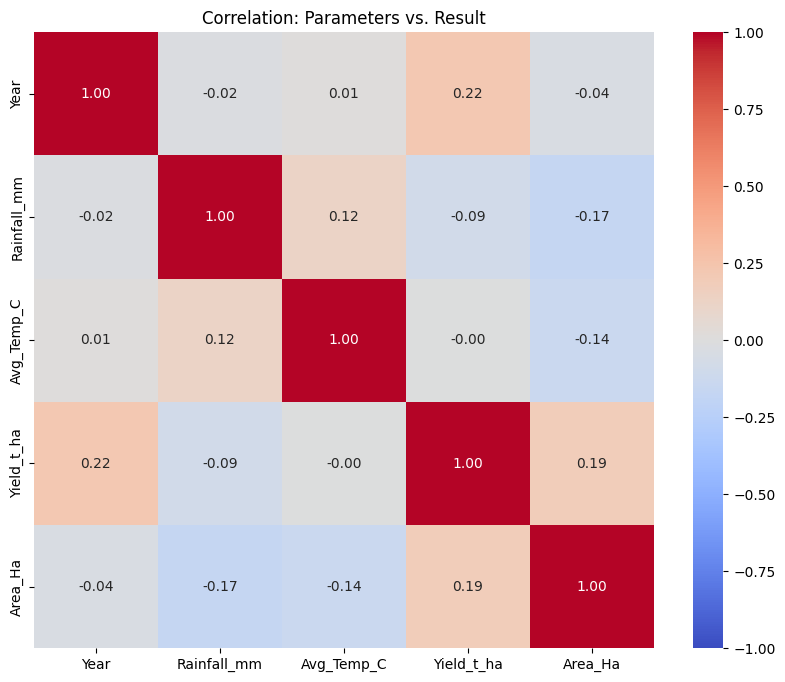

In [409]:


plt.figure(figsize=(10, 8))
# Calculate correlation between all numerical columns
corr = df2.corr()
# Plot
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation: Parameters vs. Result')
plt.show()

In [410]:
# making X
X = df.drop('Yield_t_ha',axis=1)
X.shape

(3184, 6)

In [411]:
# making y
y = df['Yield_t_ha']
y.shape

(3184,)

In [412]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [413]:
# train test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=101)


In [414]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [415]:
df['Crop'].dtype

dtype('O')

In [416]:
""" numericalFeaturesArr = []
categoricalFeaturesArr = []

for col in X.columns:
    if X[col].dtype == 'float64':
        numericalFeaturesArr.append(col)

for col in X.columns:
    if X[col].dtype == 'O':
        categoricalFeaturesArr.append(col) """

categoricalFeatures = X.select_dtypes(include="object").columns
numericalFeatures = X.select_dtypes(exclude="object").columns



In [417]:
""" numericalFeatures = df[numericalFeaturesArr]
categoricalFeatures = df[categoricalFeaturesArr] """

' numericalFeatures = df[numericalFeaturesArr]\ncategoricalFeatures = df[categoricalFeaturesArr] '

In [418]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numericalFeatures),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categoricalFeatures)
    ],
    remainder='passthrough'
)

In [419]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=101))
])

In [420]:
param_grid = [
    {
        'regressor': [XGBRegressor(random_state=101, verbosity=0)],
        'regressor__n_estimators': [64,200,500],
        'regressor__learning_rate': [0.05,0.1,0.02],
        'regressor__max_depth': [6,10],
        'regressor__gamma': [0, 0.1, 0.5, 1, 5]
    },
]

In [421]:
""" param_grid = [
    {
        'regressor': [XGBRegressor(random_state=101, verbosity=0)],
        'regressor__n_estimators': [64,100,200],
        'regressor__learning_rate': [0.05,0.1,0.3],
        'regressor__max_depth': [6,10,100],
        'regressor__gamma': [0.1, 0.5, 1]
    },
] """

" param_grid = [\n    {\n        'regressor': [XGBRegressor(random_state=101, verbosity=0)],\n        'regressor__n_estimators': [64,100,200],\n        'regressor__learning_rate': [0.05,0.1,0.3],\n        'regressor__max_depth': [6,10,100],\n        'regressor__gamma': [0.1, 0.5, 1]\n    },\n] "

In [422]:
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"[{'regressor': [XGBRegressor(...ree=None, ...)], 'regressor__gamma': [0, 0.1, ...], 'regressor__learning_rate': [0.05, 0.1, ...], 'regressor__max_depth': [6, 10], ...}]"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [423]:
grid_search.best_estimator_

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [424]:
final_test_score = abs(grid_search.score(X_test, y_test))

np.sqrt(final_test_score)

np.float64(0.5330875380239117)

In [425]:
final_test_score2 = abs(grid_search.score(X, y))

np.sqrt(final_test_score2)

np.float64(0.35249667843439036)

In [426]:
y_mean = y.mean()

In [427]:
temp = y-y_mean
ss_mean = sum((temp)**2)

ss_mean

2967.129294346734

In [428]:
y_prediction = grid_search.predict(X)

In [429]:
ss_pred = sum((y-y_prediction)**2)

ss_pred

395.6244440503732

In [430]:
r_square = 1-ss_pred/ss_mean
r_square

0.8666642384596601

In [431]:
bestEstimator = grid_search.best_estimator_

bestEstimator

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [432]:
import joblib

# joblib.dump(bestEstimator, 'best_crop_yield_model_95PercentR2.joblib')
joblib.dump(bestEstimator, 'best_crop_yield_model.joblib')
print("Model successfully saved to 'best_crop_yield_model.joblib'")

Model successfully saved to 'best_crop_yield_model.joblib'


In [433]:
# loaded_model = joblib.load('best_crop_yield_model_95PercentR2.joblib')

In [434]:
# test_prediction = loaded_model.predict(X.head(15))
# print(f"\nPrediction using loaded model for first test sample:", test_prediction)

In [435]:
y.head(15)

0     0.37
1     1.19
5     1.94
6     2.01
7     1.50
8     1.72
9     1.43
10    2.09
11    1.84
12    1.92
13    2.99
14    1.46
15    2.51
16    2.03
17    3.34
Name: Yield_t_ha, dtype: float64

In [436]:
# X_test.iloc[1]

In [437]:
""" plt.figure(figsize=(20, 15), dpi=300)

# --- CRITICAL STEP FOR YOUR PIPELINE ---
# 1. Extract the specific model step
xgboost_step = pipeline.named_steps['regressor']

# 2. Extract feature names from the preprocessor
# This ensures your tree shows 'cat_feature_A' instead of just 'f2'
preprocessor_step = pipeline.named_steps['preprocessor']

try:
    # Get feature names (requires sklearn >= 1.0)
    feature_names = preprocessor_step.get_feature_names_out()

    # Clean up names (e.g., remove 'num__' or 'cat__' prefixes if desired)
    # sklearn outputs format like 'cat__cat_feature_A'
    clean_names = [name.split('__')[-1] for name in feature_names]

    # Assign these names to the booster so the plot uses them
    xgboost_step.get_booster().feature_names = clean_names
except Exception as e:
    print(f"Note: Could not extract specific feature names ({e}). Plot will use f0, f1...")

# Plot the first tree
xgboost.plot_tree(xgboost_step, num_trees=0, rankdir='LR')

# 4. Save and Show
output_file = 'xgb_pipeline_tree.png'
plt.savefig(output_file)
print(f"Tree visualization saved to {output_file}")

try:
    plt.show()
except Exception:
    print("Check the saved file.") """

' plt.figure(figsize=(20, 15), dpi=300)\n\n# --- CRITICAL STEP FOR YOUR PIPELINE ---\n# 1. Extract the specific model step\nxgboost_step = pipeline.named_steps[\'regressor\']\n\n# 2. Extract feature names from the preprocessor\n# This ensures your tree shows \'cat_feature_A\' instead of just \'f2\'\npreprocessor_step = pipeline.named_steps[\'preprocessor\']\n\ntry:\n    # Get feature names (requires sklearn >= 1.0)\n    feature_names = preprocessor_step.get_feature_names_out()\n\n    # Clean up names (e.g., remove \'num__\' or \'cat__\' prefixes if desired)\n    # sklearn outputs format like \'cat__cat_feature_A\'\n    clean_names = [name.split(\'__\')[-1] for name in feature_names]\n\n    # Assign these names to the booster so the plot uses them\n    xgboost_step.get_booster().feature_names = clean_names\nexcept Exception as e:\n    print(f"Note: Could not extract specific feature names ({e}). Plot will use f0, f1...")\n\n# Plot the first tree\nxgboost.plot_tree(xgboost_step, num_tree

In [438]:
pipeline.named_steps

{'preprocessor': ColumnTransformer(remainder='passthrough',
                   transformers=[('num', StandardScaler(),
                                  Index(['Year', 'Rainfall_mm', 'Avg_Temp_C', 'Area_Ha'], dtype='object')),
                                 ('cat', OneHotEncoder(handle_unknown='ignore'),
                                  Index(['District', 'Crop'], dtype='object'))]),
 'regressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child